# Stock Analysis Project using Python
## Stocks Analyzed: GOOG, AAPL, AMZN, MSFT, TSLA & NVDA

In [188]:
# Importing necessary libraries for analysis
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')#setting visual style for plots
%matplotlib inline

In [189]:
# installing and importing libraries for data caollection
!pip install pandas_datareader
!pip install yfinance
import yfinance as yf
from pandas_datareader import data as pdr #to read stock data from Yahoo
from datetime import datetime #for time stamps

## Data Collection

In [190]:
# collect stock data for the following stocks from Yahoo Finance
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'TSLA', 'NVDA']

# Here I am setting up and defining the start and end dates for the analysis
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

## Fetching and Storing Stock Data using Dictionaries

In [191]:
# Here I am creating a loop to grab the stock data from yfinance
# I will use this for referencing later in my codes e.g. stock_data['AAPL'].describe()
stock_data = {}
for stock in tech_list:
    stock_data[stock] = yf.download(stock,start=start,end=end, auto_adjust=False)#used auto_adjust to get the 'adj close', you can also use auto_adjust=True to reflect adjusted price(taking into account stock split and dividends) 
    print(f"Data for {stock} :\n", stock_data[stock].head()) #used this code to preview the first 5 rows of data to verify that the data was fetched correctly

print("\nDescriptive Statistics for {stock}:")
print(stock_data[stock].describe())
print("\nColumn Information for {stock}:")
print(stock_data[stock].info())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Data for AAPL :
 Price        Adj Close       Close        High         Low        Open  \
Ticker            AAPL        AAPL        AAPL        AAPL        AAPL   
Date                                                                     
2024-03-27  172.495499  173.309998  173.600006  170.110001  170.410004   
2024-03-28  170.674103  171.479996  172.229996  170.509995  171.750000   
2024-04-01  169.230927  170.029999  171.250000  169.479996  171.190002   
2024-04-02  168.046509  168.839996  169.339996  168.229996  169.080002   
2024-04-03  168.852692  169.649994  170.679993  168.580002  168.789993   

Price         Volume  
Ticker          AAPL  
Date                  
2024-03-27  60273300  
2024-03-28  65672700  
2024-04-01  46240500  
2024-04-02  49329500  
2024-04-03  47691700  


Data for GOOG :
 Price        Adj Close       Close        High         Low        Open  \
Ticker            GOOG        GOOG        GOOG        GOOG        GOOG   
Date                                                                     
2024-03-27  151.223724  151.940002  152.690002  150.130005  152.145004   
2024-03-28  151.542221  152.259995  152.669998  151.330002  152.000000   
2024-04-01  155.762238  156.500000  157.000000  151.649994  151.830002   
2024-04-02  155.135193  155.869995  155.990005  153.460007  154.750000   
2024-04-03  155.632843  156.369995  156.550003  154.132004  154.919998   

Price         Volume  
Ticker          GOOG  
Date                  
2024-03-27  16622000  
2024-03-28  21105600  
2024-04-01  24469800  
2024-04-02  17598100  
2024-04-03  17266200  


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data for MSFT :
 Price        Adj Close       Close        High         Low        Open  \
Ticker            MSFT        MSFT        MSFT        MSFT        MSFT   
Date                                                                     
2024-03-27  418.236908  421.429993  424.450012  419.010010  424.440002   
2024-03-28  417.532288  420.720001  421.869995  419.119995  420.959991   
2024-04-01  421.353088  424.570007  427.890015  422.220001  423.950012   
2024-04-02  418.246857  421.440002  422.380005  417.839996  420.109985   
2024-04-03  417.264343  420.450012  423.260010  419.089996  419.730011   

Price         Volume  
Ticker          MSFT  
Date                  
2024-03-27  16705000  
2024-03-28  21871200  
2024-04-01  16316000  
2024-04-02  17912000  
2024-04-03  16502300  
Data for AMZN :
 Price        Adj Close       Close        High         Low        Open  \
Ticker            AMZN        AMZN        AMZN        AMZN        AMZN   
Date                                     

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data for TSLA :
 Price        Adj Close       Close        High         Low        Open  \
Ticker            TSLA        TSLA        TSLA        TSLA        TSLA   
Date                                                                     
2024-03-27  179.830002  179.830002  181.910004  176.000000  181.410004   
2024-03-28  175.789993  175.789993  179.570007  175.300003  177.449997   
2024-04-01  175.220001  175.220001  176.750000  170.210007  176.169998   
2024-04-02  166.630005  166.630005  167.690002  163.429993  164.750000   
2024-04-03  168.380005  168.380005  168.820007  163.279999  164.020004   

Price          Volume  
Ticker           TSLA  
Date                   
2024-03-27   81804000  
2024-03-28   77654800  
2024-04-01   81562100  
2024-04-02  116650600  
2024-04-03   82950100  
Data for NVDA :
 Price       Adj Close      Close       High        Low       Open     Volume
Ticker           NVDA       NVDA       NVDA       NVDA       NVDA       NVDA
Date                       

In [192]:
# Here I am correcting the index type to datetime to ensure proper handling of time series data
for stock in tech_list:
    stock_data[stock].index = pd.to_datetime(stock_data[stock].index)  # Ensure index is datetime

# Question 1 - What was the change in stock price over time?
### Visualizing Adjusted Close Prices

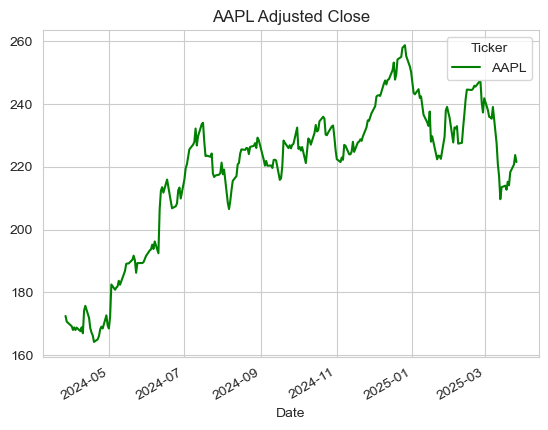

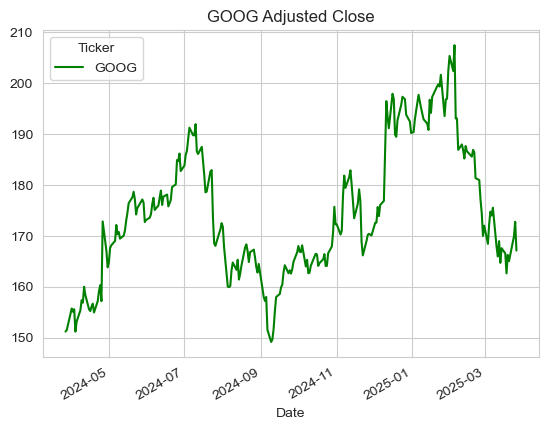

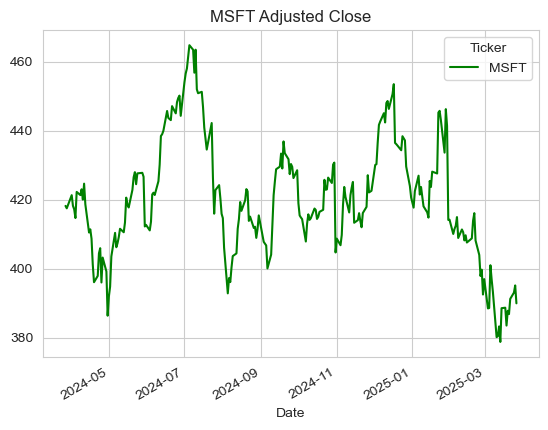

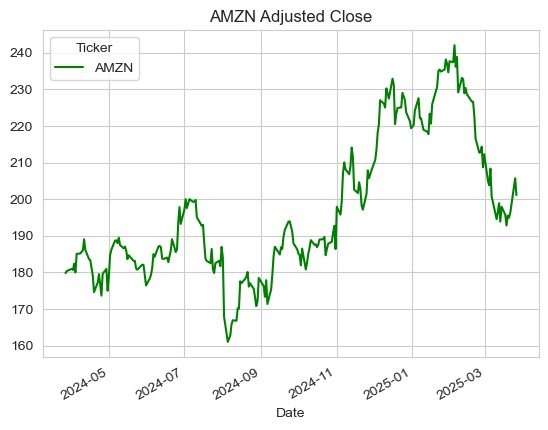

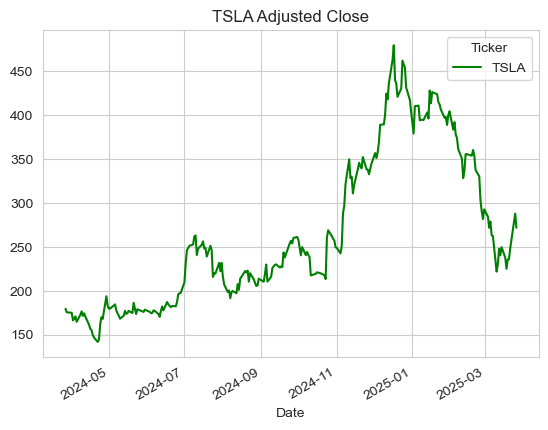

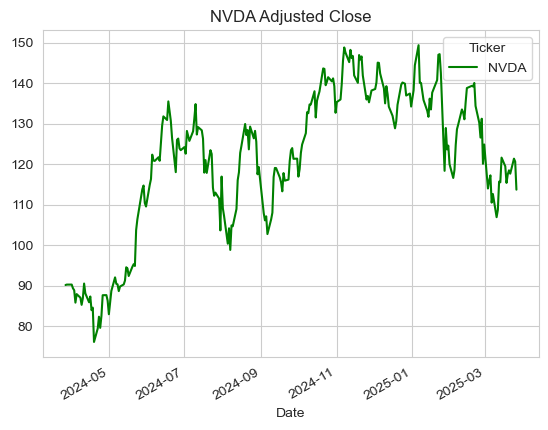

In [193]:
for stock in tech_list:
    stock_data[stock]['Adj Close'].plot(legend=True, title=f"{stock} Adjusted Close", color='green') # Shows one plot at a time for each stock
    plt.show() 

### Total Volume of Stock Traded Each Day

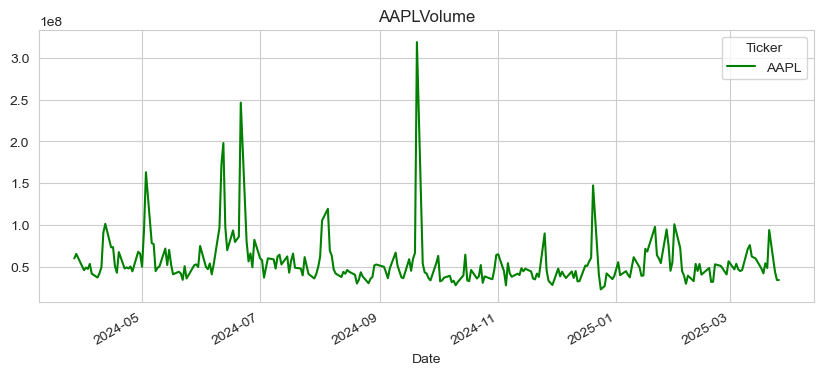

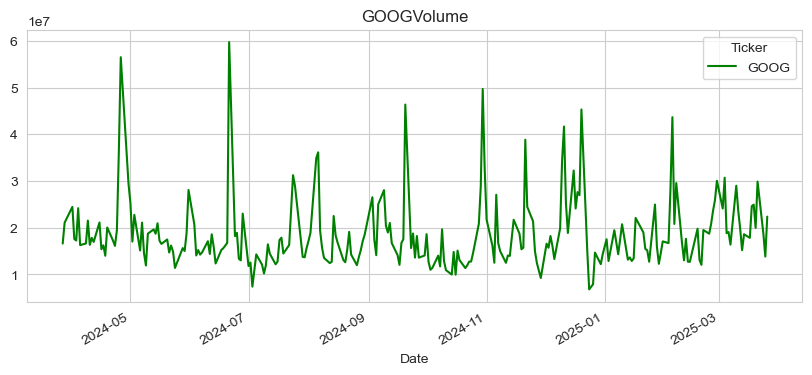

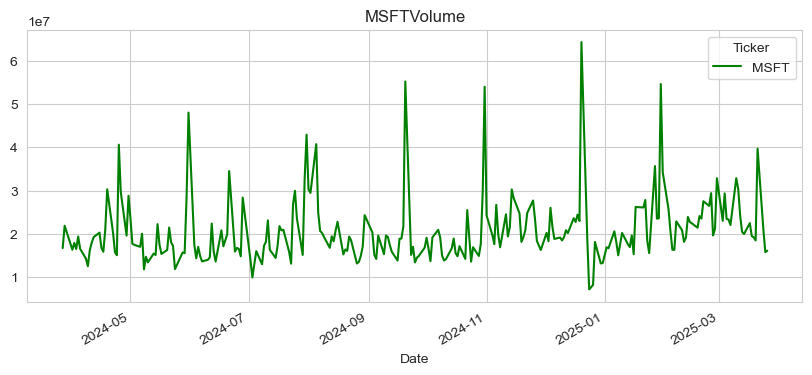

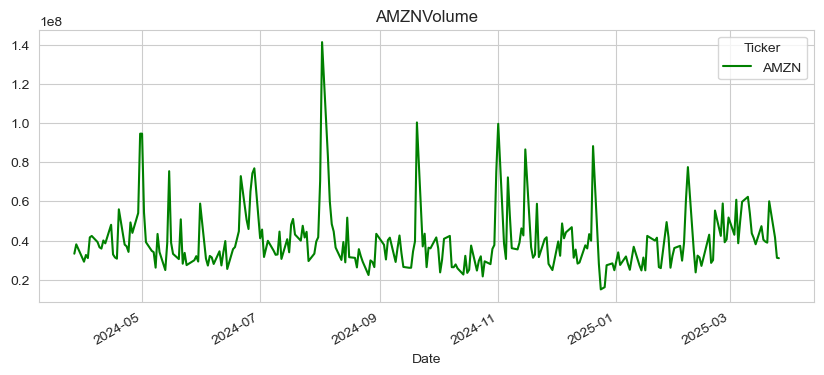

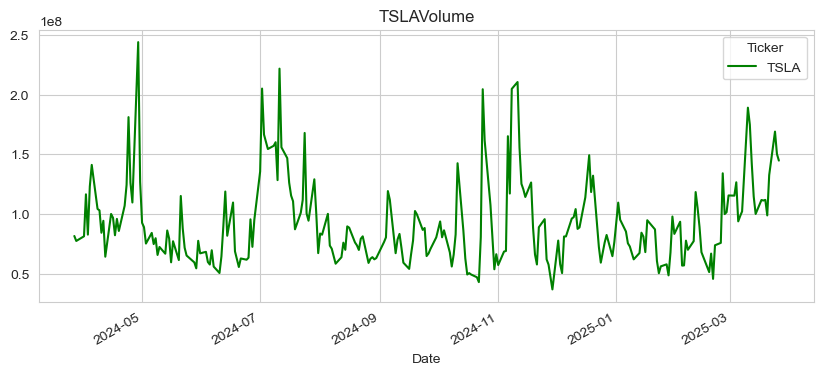

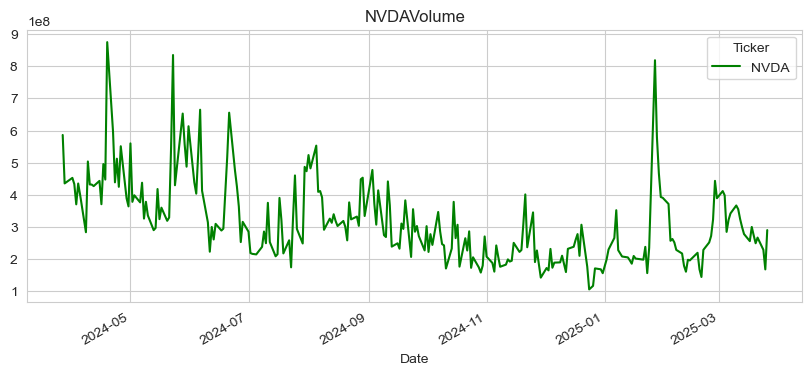

In [194]:
for stock in tech_list:
    stock_data[stock]['Volume'].plot(legend=True, figsize=(10,4), title=f'{stock}Volume', color='green')
    plt.show()

Interesting, all stock volumes are moving downwards but NVDA is slowly starting to move upwards... is this a recovery signal?

# Question 2 - What was the moving averages of the various stocks?

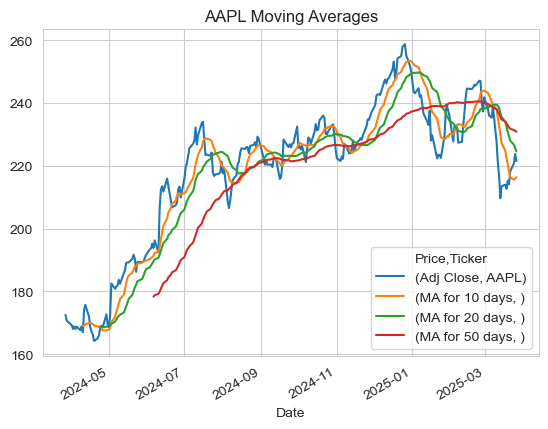

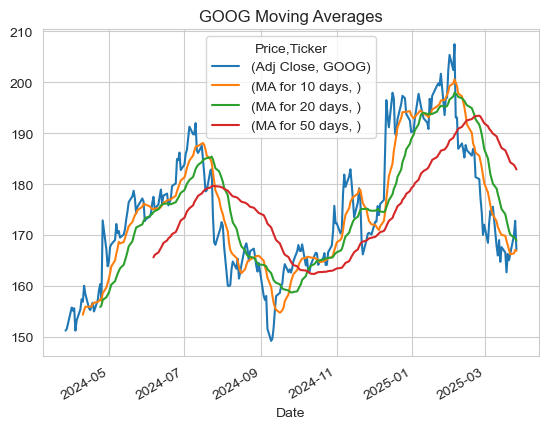

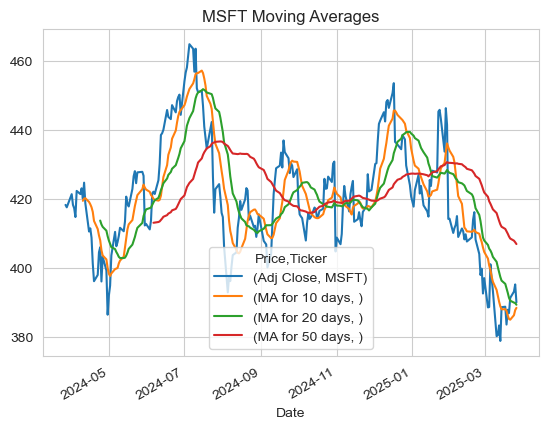

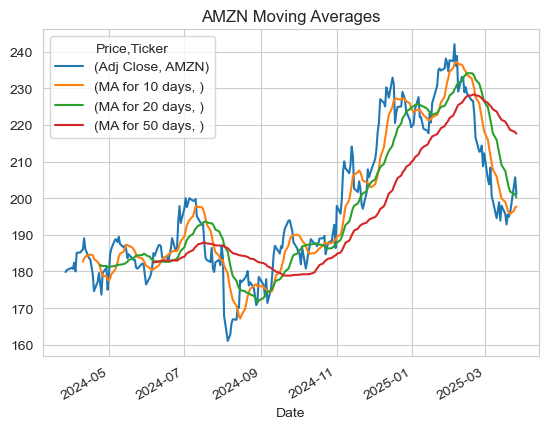

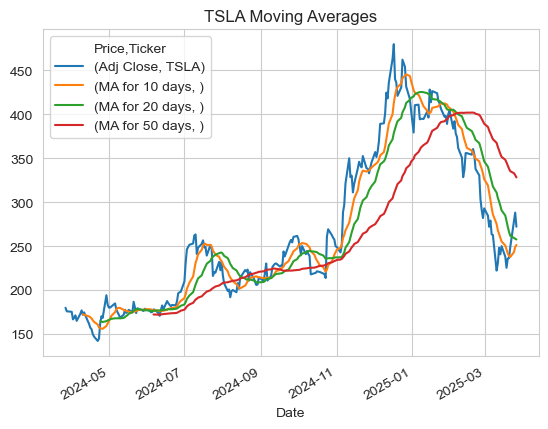

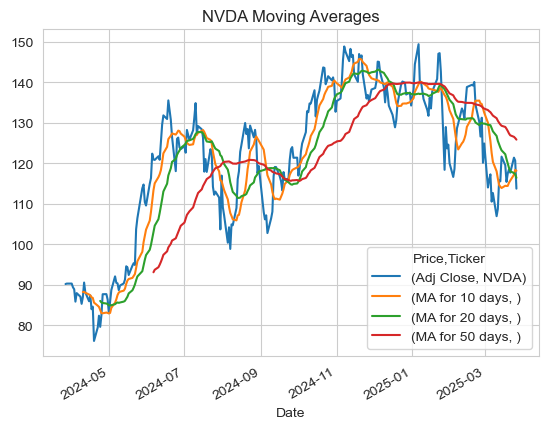

In [195]:
# here I will be calculating the moving averages across 10, 20, and 50 days
ma_days = [10, 20, 50]
for stock in tech_list:
    for ma in ma_days:
        Column_name = f'MA for {ma} days'
        stock_data[stock][Column_name] = stock_data[stock]['Adj Close'].rolling(window=ma).mean()
   
    stock_data[stock][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots=False, title=f'{stock} Moving Averages')
    plt.show()

From the analysis above, the moving average for all 6 stocks is sloping downwards indicating that there is negative market sentiment and bearish market conditions. Additionally, the 10days moving average for all the stocks is below the 50days moving average indicating a signal to sell or avoid buying as the stocks are likely to continue underperforming in the short-term. However, looking at NVDA, it seems there is a slight crossover of 10-day MA above the 20-day MA - it is possibble there could bbe a shift in momentum since there are positive news in the market regarding AI technologies and cloud computing. Will keep a close eye on this since total volume traded fro NVDA stocks is also diverging upwards.  

# Question 3 - What was the daily return of the stocks on average

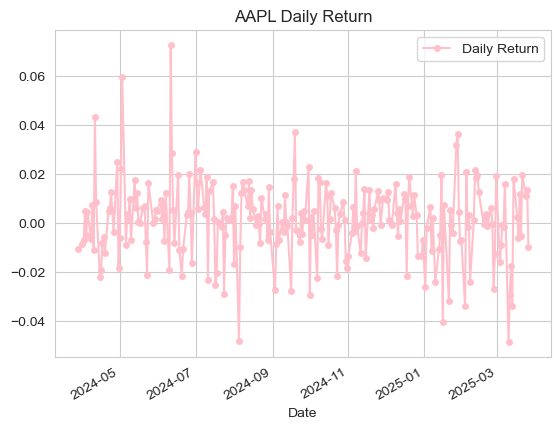

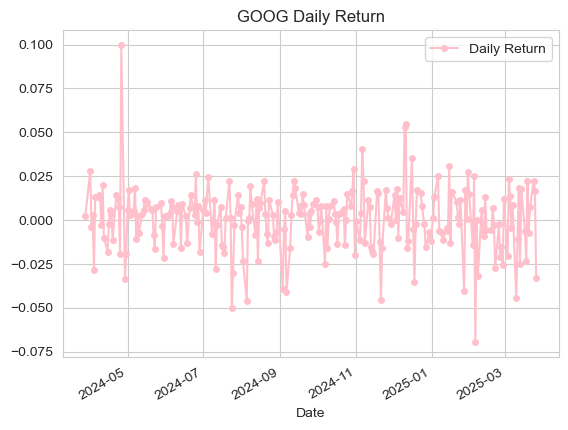

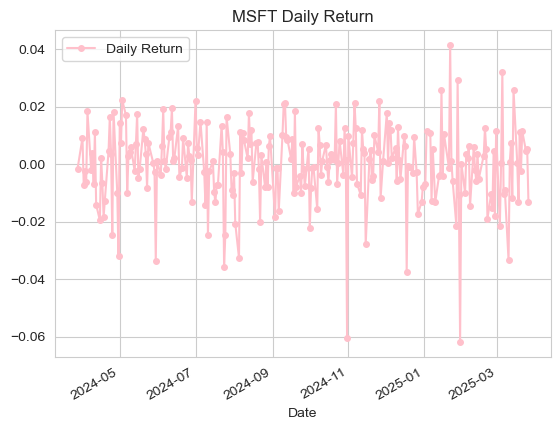

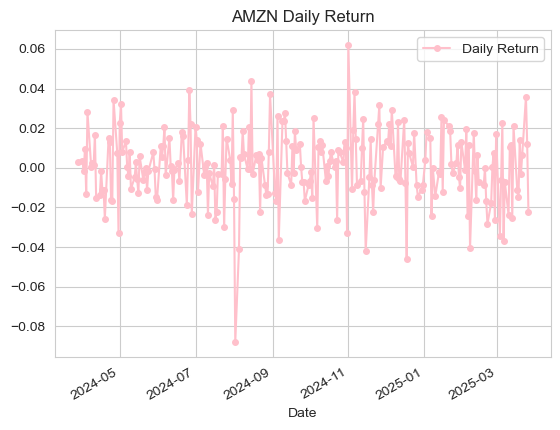

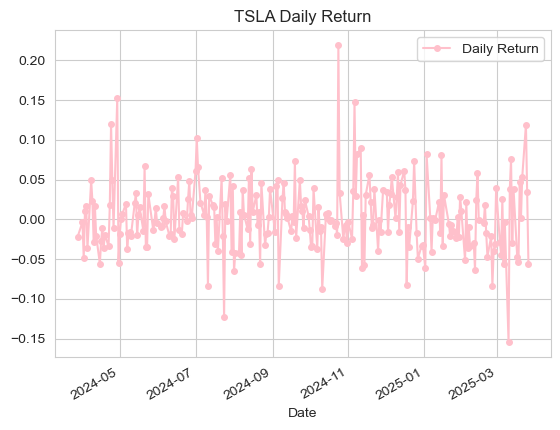

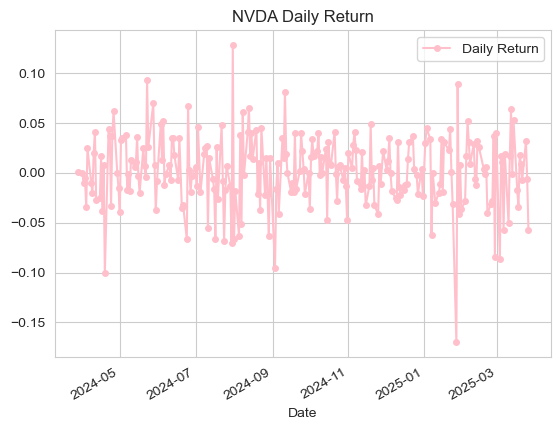

In [196]:
# using pct_change to find the percent change for each day
for stock in tech_list:
    stock_data[stock]['Daily Return'] = stock_data[stock]['Adj Close'].pct_change().dropna()
    stock_data[stock]['Daily Return'].dropna().plot(legend=True, marker='o', markersize=4, title=f'{stock} Daily Return', color='pink')

    plt.show()

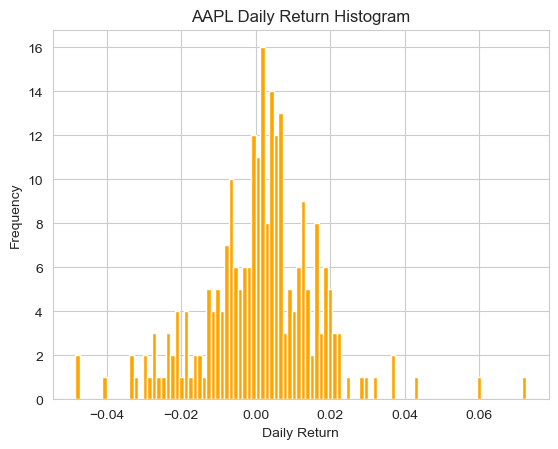

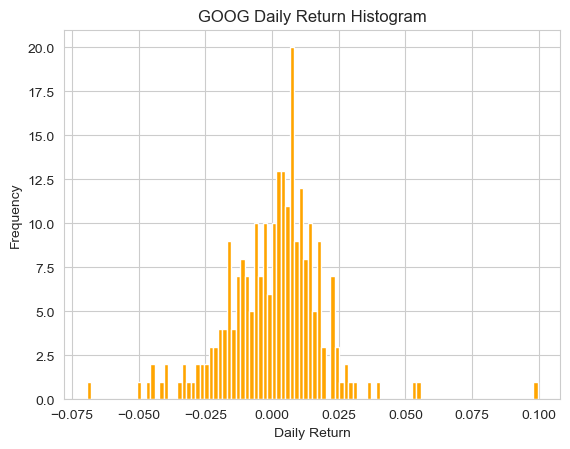

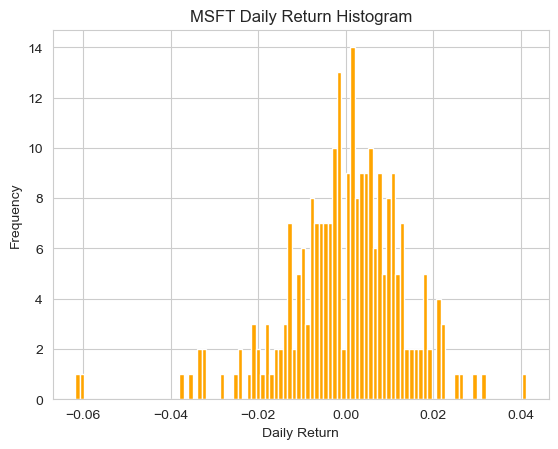

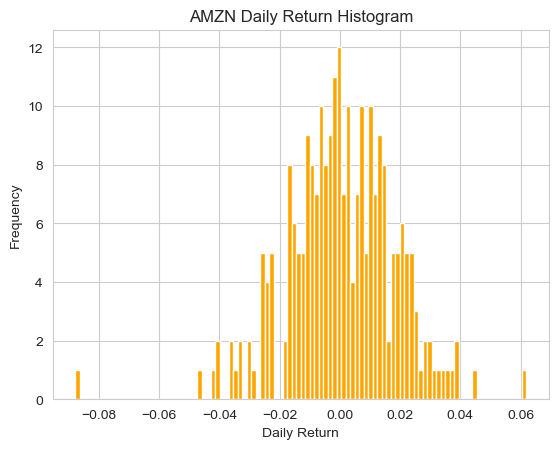

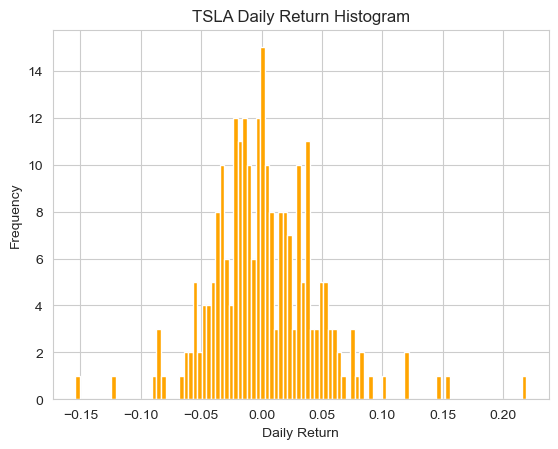

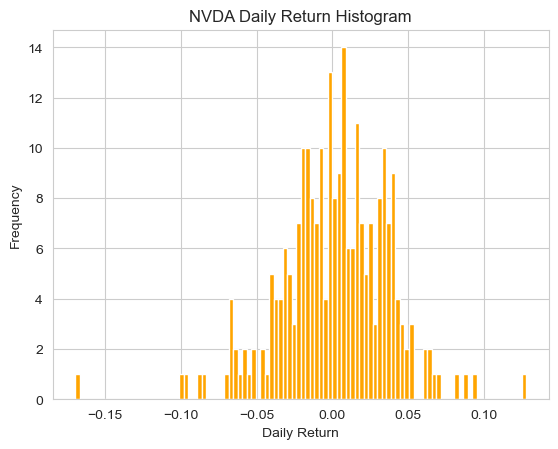

In [197]:
for stock in tech_list:
    stock_data[stock]['Daily Return'].hist(bins=100, color='orange')  # Use alpha for transparency if you overlap plots
    plt.title(f"{stock} Daily Return Histogram")
    plt.xlabel("Daily Return")
    plt.ylabel("Frequency")
    plt.show()

# Question 4 - What was the correlation between different stocks' daily returns?

In [198]:
# Here I am putting all closing prices for the 6 stocks into one dataframe
data = yf.download(tech_list, start=start, end=end, auto_adjust=False)
closing_df = data['Adj Close']
closing_df.head()

[*********************100%***********************]  6 of 6 completed


Ticker,AAPL,AMZN,GOOG,MSFT,NVDA,TSLA
Date,,,,,,
2024-03-27,172.495514,179.830002,151.223724,418.236908,90.220352,179.830002
2024-03-28,170.674103,180.380005,151.542221,417.532288,90.326317,175.789993
2024-04-01,169.230911,180.970001,155.762238,421.353119,90.333313,175.220001
2024-04-02,168.046494,180.690002,155.135193,418.246857,89.422615,166.630005
2024-04-03,168.852692,182.410004,155.632843,417.264343,88.934776,168.380005


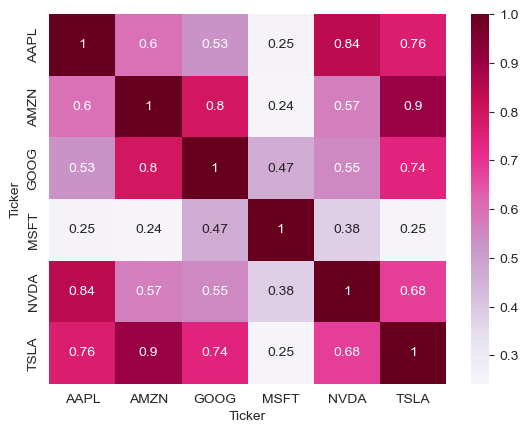

In [199]:
sns.heatmap(closing_df.corr(), annot=True, cmap='PuRd')
plt.show()

From the above, we can see that TSLA & AMZN, NVDA & AAPL stocks exhibit similar behaviors.

In [200]:
Tech_Returns = closing_df.pct_change()
Tech_Returns.head()

Ticker,AAPL,AMZN,GOOG,MSFT,NVDA,TSLA
Date,,,,,,
2024-03-27,NaN,NaN,NaN,NaN,NaN,NaN
2024-03-28,-0.010559,0.003058,0.002106,-0.001685,0.001175,-0.022466
2024-04-01,-0.008456,0.003271,0.027847,0.009151,0.000077,-0.003242
2024-04-02,-0.006999,-0.001547,-0.004026,-0.007372,-0.010082,-0.049024
2024-04-03,0.004797,0.009519,0.003208,-0.002349,-0.005455,0.010502


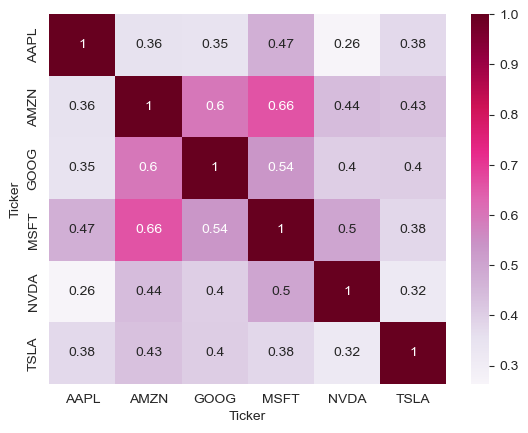

In [201]:
sns.heatmap(Tech_Returns.corr(), annot=True, cmap='PuRd')
plt.show()

From the analysis above, there is a moderately positive correlation of 0.66 between MSFT and AMZN. Both companies have significant investments in cloud computing via Amazon Web Services and Microsoft Azure, which is a fast growing and competitive market at the moment. could this be why they are positively related? maybe

### Comparing Daily Percentage Returns of MSFT and AMZN to see how correlated they are

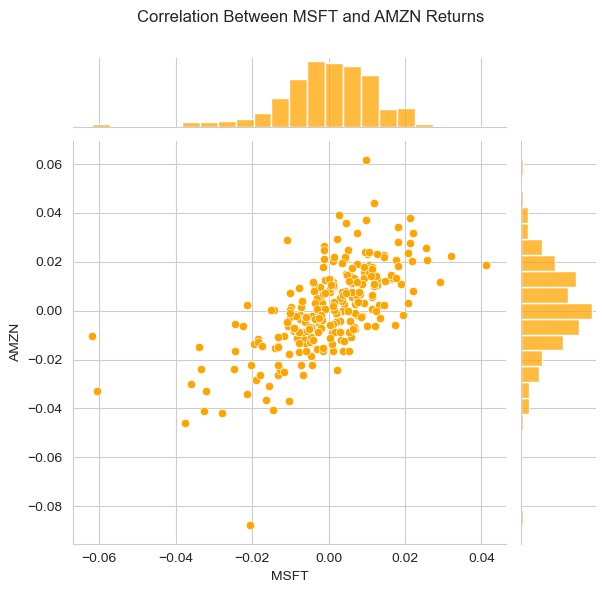

In [202]:
sns.jointplot(x='MSFT', y='AMZN', data=Tech_Returns, kind = 'scatter', color='orange')
plt.suptitle('Correlation Between MSFT and AMZN Returns', fontsize=12)
plt.subplots_adjust(top=0.9)
plt.show()

### Comparing the daily percentage returns of all the stocks in the analysis to find a correlation

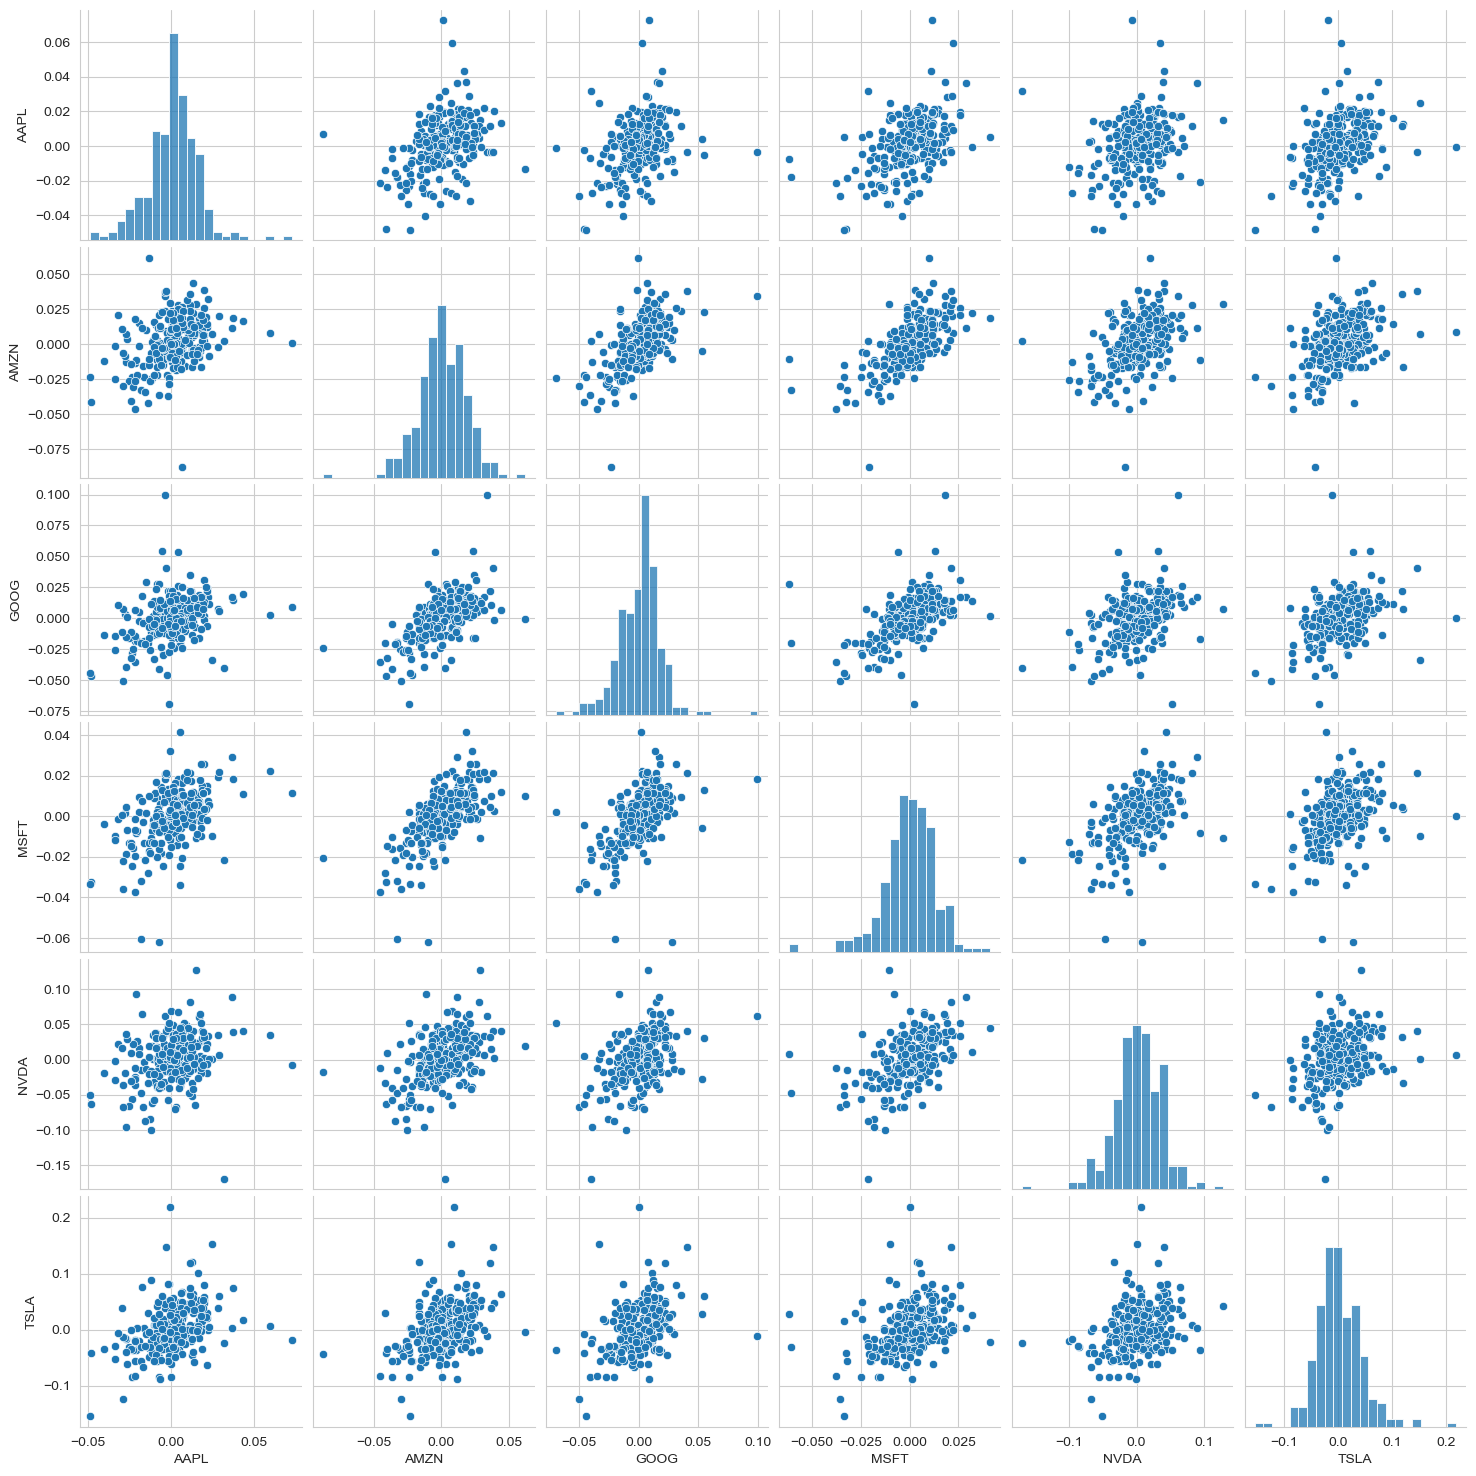

In [203]:
sns.pairplot(Tech_Returns.dropna())
plt.show()

From the above, it seems like AMZN and GOOG also have a moderately positive relationship. This could be because google is also a player in the cloud computing market and cloud computing is growing rapidly. It could also be that their business models are similar since they both invest heavily in AI technologies and both companies use AI to optimize their respective operations

### Comparing the daily returns of all the stocks in the analysis to find a correlation using Seaborn PairGrid

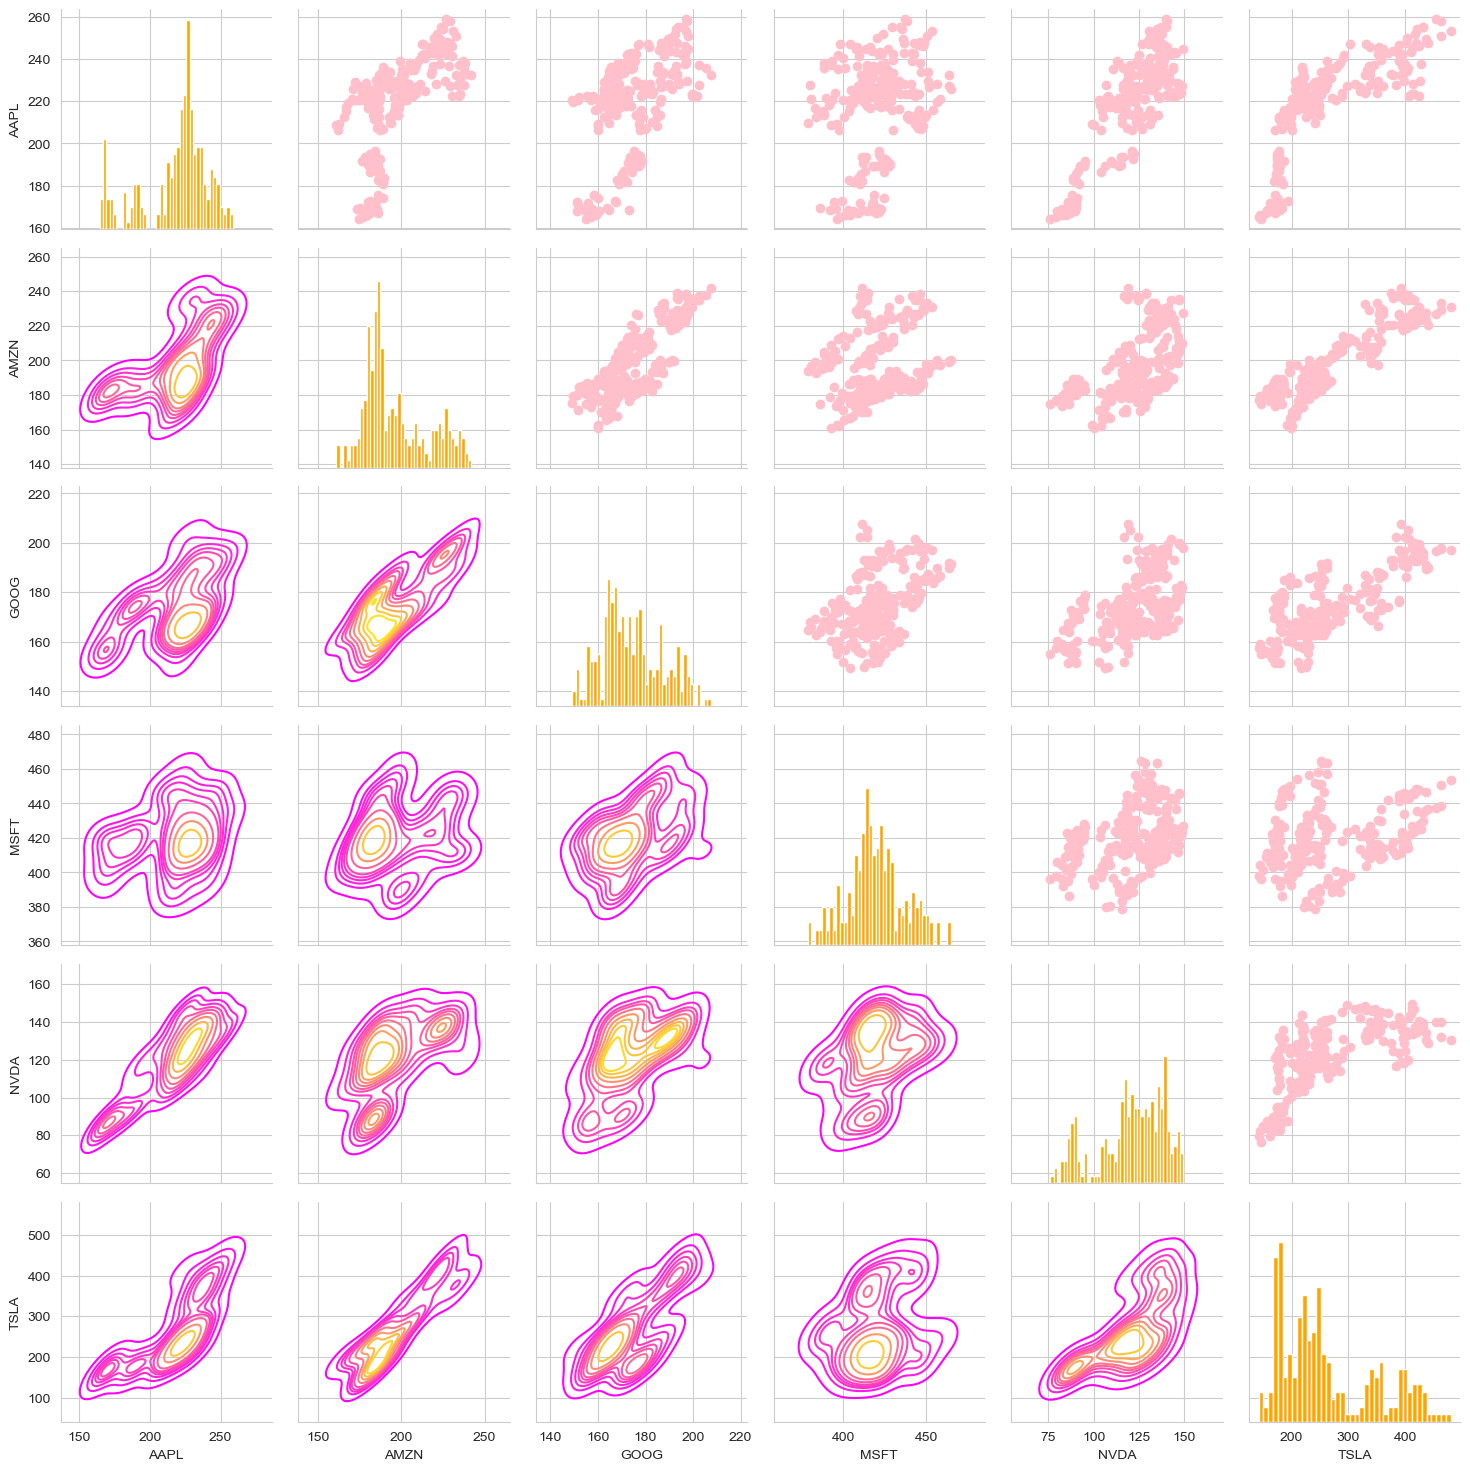

In [204]:
Returns_figure = sns.PairGrid(closing_df)

Returns_figure.map_upper(plt.scatter, color='pink')
Returns_figure.map_lower(sns.kdeplot, cmap='spring')
Returns_figure.map_diag(plt.hist, bins=40, color='orange')

plt.show()

# Risk Analysis

### Comparing the expected return with the standard deviation (std) of the daily returns to analyze risk-return

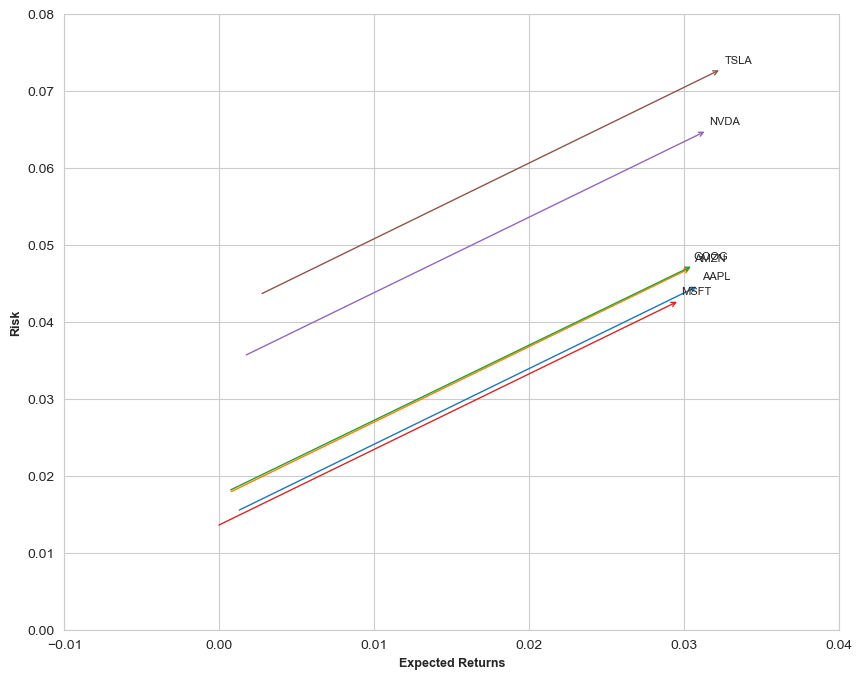

In [205]:
# Clean the data using dropna
returns = Tech_Returns.dropna()

# Generate distinct colors dynamically
colors = plt.cm.tab10(np.arange(len(returns.columns)))  # Ensures enough colors for all stocks

# Create a larger figure for better visibility
plt.figure(figsize=(10, 8))

# Set axis limits to ensure everything fits well
plt.xlim(-0.01, 0.04)
plt.ylim(0.00, 0.08)

# Axis labels
plt.xlabel('Expected Returns', fontsize=9, fontweight='bold')
plt.ylabel('Risk', fontsize=9, fontweight='bold')


# Plot each stock's risk vs. return
for label, x, y, color in zip(returns.columns, returns.mean(), returns.std(), colors):
   
    plt.annotate(
        label,
        xy=(x, y),
        xytext=(x+0.03, y+0.03),
        fontsize=8,
        arrowprops=dict(arrowstyle='<-', color=color, lw=1)
    )
plt.show()

From the above, AMZN & GOOG have similar risk-return profiles. TSLA offfers the highest reruns but comes with a lot of risk. MSFT has low risk but moderate returns. AAPL seems like a good middle gorund as it has moderate risk and great return potential

# Question 5 - How much value do we put at risk by investing in a particular stock?

### Answering question 5 by calculating Value at Risk (VaR) using the 'Bootstrap' Method

In [206]:
returns['NVDA'].quantile(0.05)

-0.060269657335684186

This number basically tells me that with 95% confidence, I am only going to lose 6.2%  of my money on any given day under normal market conditions. In other words, 95% of the time, I will not lose more than 6.2% everyday. For example, if I invest 1,000,000, the worse i could typically lose in a day is 62,000 for NVDA stock. 

Note that this method does not consider markket crashes or extreme market events so the actual losses could be higher in rare cases like a market crash

### Answering Question 5 using Monte Carlo Simulation for NVDA

In [207]:
# Monte Carlo Simulation Parameters
# Here I am setting up the time horizon
days = 365

# I am setting up the delta here
dt = 1/days

# Now I am grabbing the mu (drift) from the expected return data gotten for NVDA
mu = returns.mean()['NVDA']

# doing the same as drift above - for the volatility of the stock (sigma) I am using the std() of the average return
sigma = returns.std()['NVDA']

In [208]:
# Here I am defining the monte carlo simulation function
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # First I will define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Shock and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Then I will run price array for number of days
    for x in range(1,days):
        
        # Calculate Shock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [209]:
stock_data['NVDA'].head()

Price,Adj Close,Close,High,Low,Open,Volume,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA,,,,
Date,,,,,,,,,,
2024-03-27,90.220345,90.250000,93.239998,89.123001,93.112000,586067000,NaN,NaN,NaN,NaN
2024-03-28,90.326317,90.356003,91.300003,89.193001,90.000000,435212000,NaN,NaN,NaN,0.001175
2024-04-01,90.333313,90.362999,92.224998,89.204002,90.299004,452441000,NaN,NaN,NaN,0.000077
2024-04-02,89.422615,89.452003,90.094002,87.620003,88.447998,433064000,NaN,NaN,NaN,-0.010082
2024-04-03,88.934776,88.963997,90.374001,88.400002,88.484001,370067000,NaN,NaN,NaN,-0.005455


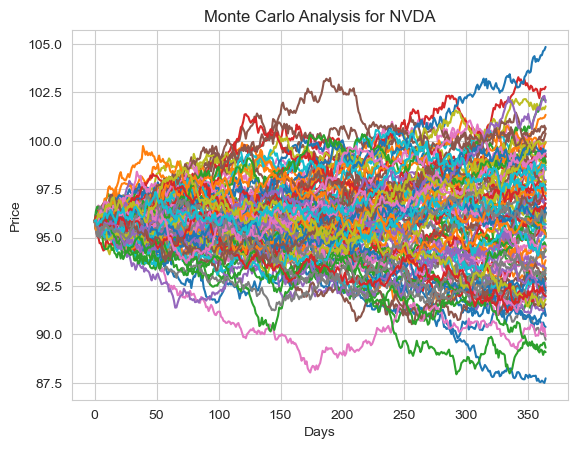

In [210]:
# This is the initial price for NVDA - Get this start/initial price from NVDA.head()
start_price = 95.85

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for NVDA')
plt.show()

# Question 6 - How can we attempt to predict future stock behaviour?
### Monte Carlo simulation with 10,000 runs for Value at Risk (VaR) Analysis

In [211]:
# Start by setting a large numebr of runs
runs = 10000

# I will then create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Next, I will set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

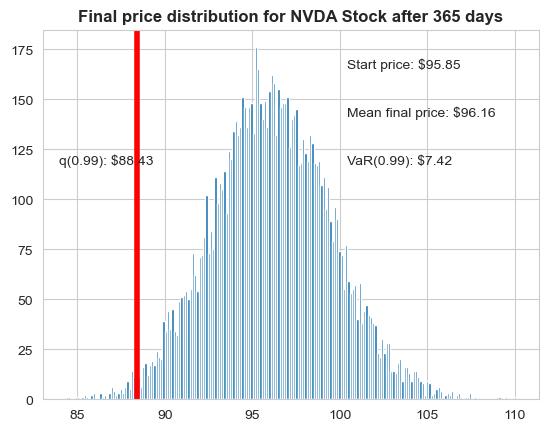

In [212]:
# here, i will use numpy to define q as the 1% empirical qunatile, meaning that 99% of the values should fall between our output
q = np.percentile(simulations, 1)
    
# this will help me plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext, I will fill in some additional information onto the plot

# inputting starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# input mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for NVDA Stock after %s days" % days, weight='bold');
plt.show()

This histogram shows all of the final prices from the monte carlo simulation. The starting price was 95.85 and the average final price is 96.16 meaning it is a very stable stock. Looking at the value at risk (VaR), it means that 99% of the time, the amount of money I will lose at most is 7.42 over a year  - which isn't bad as my inital investment was 95.85! Might be worth considering NVDA  